In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats
%precision 3
%matplotlib inline

!pip install japanize-matplotlib
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

     |████████████████████████████████| 4.1MB 3.0MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=e389090554c925f7dfa4186b08aba1852c31bf45e3d57cf752d7f027edb2dcbb
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("drive/My Drive/統計/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 一次元の離散型確率変数の定義
確率関数（確率質量関数）…確率変数Xのとりうる値の集合を$x_1,x_2,…$として確率変数Xが$x_k$という値をとる確率を<br>
$P(X = x_k) = p_k (k=1,2,3…)$と定義できる。<br>
このとき確率はとりうる値$x$を引数にとる関数と見ることができるため、<br>
$f(x) = P(X=x)$<br>
となる$f(x)$を考えることが出来、これを確率質量関数または確率関数と呼ぶ。

In [ ]:
#さいころを使用して考えてみる。
x_set = np.array([1,2,3,4,5,6])

今回いかさまのさいころを使用していろいろやってみるのでこのさいころの確率関数を次のように定義する。<br>
$f(x) = x/21(x∈{[1,2,3,4,5,6]})   | 0 (otherwise)$

In [ ]:
def f(x):
  if x in x_set:
    return x / 21
  else:
    return 0

In [ ]:
X = [x_set , f]

In [ ]:
#確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set , prob ))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

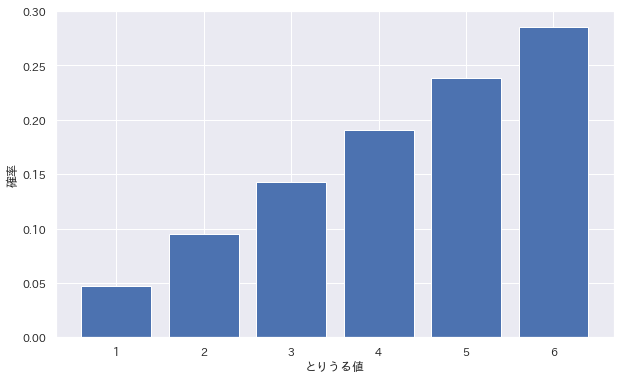

In [ ]:
fig = plt.figure(figsize=(10 , 6))
ax = fig.add_subplot(111)
ax.bar(x_set , prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel("確率")

plt.show()

###  確率の性質
$f(x_k)≧0$かつ$\sum_{k}^{}f(x_k) = 1$

In [ ]:
#確率がすべて0以上である
np.all(prob >= 0)

True

In [ ]:
#総和が１になる。
np.sum(prob)

1.000

### 累積分布関数
$F(x) = P(X≦x) = \sum_{x_k≦x}f(x_k)$

In [ ]:
def F(x):
  return np.sum([f(x_k) for x_k in x_set if x_k <= x]) 

In [ ]:
print(F(3))
print(F(4))
print(F(6))

0.2857142857142857
0.47619047619047616
0.9999999999999999


In [ ]:
# Y = 2X + 3として考えてみる
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set , prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 平均・期待値
$E(X) = \sum_{k}x_kf(x_k)$

In [ ]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [ ]:
#100万回ふったときの平均を求めてみる
sample = np.random.choice(x_set , int(1e6) , p = prob)
np.mean(sample)

4.333

期待値の性質<br>
E(2X + 3) = 2*E(X) + 3

In [ ]:
def E(X , g=lambda x:x):
  x_set , f = X
  return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [ ]:
E(X)

4.333

In [ ]:
# Y=2X + 3
E(X, g = lambda x : 2*x + 3)

11.667

In [ ]:
2 * E(X) + 3

11.667

### 分散
$V(X) = \sum_{k}(x_k -　μ)^2f(x_k)$

In [ ]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.222

分散の性質<br>
V(2X + 3) = 4V(X)

In [ ]:
def V(X , g=lambda x:x):
  x_set , f = X
  mean = E(X , g)
  return np.sum([(g(x_k) -mean)**2 * f(x_k) for x_k in x_set])

In [ ]:
V(X)

2.222

In [ ]:
V(X , lambda x : 2 * x + 3)

8.889

### 同時確率分布
二次元の確率変数では一次元の確率変数を2つ同時に扱い、（X,Y）と表記する。（X,Y）のとりうる値の組み合わせの集合を<br>
${(x_i,y_j)|（i=1,2,3…;ｊ=1,2,3…）}$とすると、確率はそれぞれのとりうる値の組み合わせについて定義できて、確率変数Xが$x_i$,確率変数Yが$y_j$をとる確率は、<br>
$P(X = x_i , Y = y_j) = p_{ij}（i=1,2,3…;ｊ=1,2,3…）$<br>
と表すことができる。<br>
2つのさいころが独立していた場合は共分散が０であるため面白くない。そのため今回はさいころAの出目をY、さいころAとさいころBの出目を足し合とした二次元の確率分布を考えることにする。この時、XとYそれぞれのとりうる値の集合はYが｛1,2,3,4,5,6｝,Xが｛2,3,4,5,6,7,8,9,10,11,12｝となる。<br>
同時確率関数…$P(X=x , Y = y) = f_{XY}(x,y)$<br>
二次元の離散型確率変数も一次元と同様に確率は必ず０以上で全確率の和が1でなければならない。そのため以下の性質を満たす。<br>
$f_{XY}(x_i,y_j)≧0$かつ$\sum_{i}\sum_{j}f_{XY}(x_i , y_j) = 1$

In [ ]:
x_set = np.arange(2,13)
y_set = np.arange(1,7)

In [ ]:
#同時確率関数
#今回は上のいかさまさいころを使用しているため、?/441の形になっている。
def f_XY(x,y):
  if 1 <= y <= 6 and 1 <= x - y <= 6:
    return y * (x - y)/441 
  else:
    return 0

In [ ]:
XY = [x_set , y_set , f_XY]


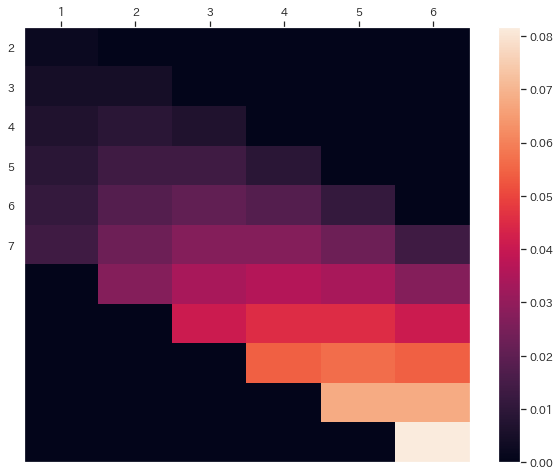

In [ ]:
#確率分布の表示
prob = np.array([[f_XY(x_i , y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize = (10 , 8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5 , minor=False)
ax.set_yticks(np.arange(prob.shape[1]) + 0.5 , minor=False)
ax.set_xticklabels(np.arange(1,7) , minor = False)
ax.set_yticklabels(np.arange(2,13) , minor = False)

ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c , ax=ax)
plt.show()

### 周辺確率分布



In [ ]:
def f_X(x):
  return np.sum([f_XY(x,y_k) for y_k in y_set])

In [ ]:
def f_Y(y):
  return np.sum([f_XY(x_k,y) for x_k in x_set])

In [ ]:
X = [x_set , f_X]
Y = [y_set , f_Y]

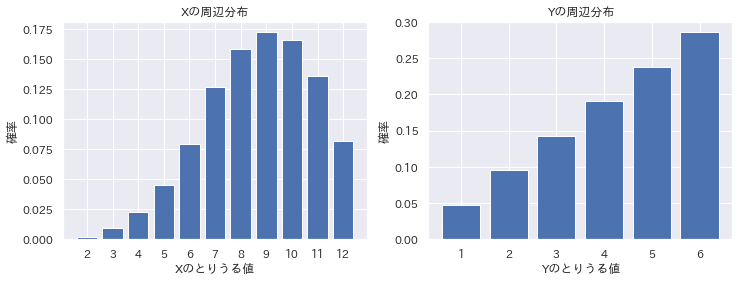

In [ ]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set , prob_x)
ax1.set_title('Xの周辺分布')
ax1.set_xlabel("Xのとりうる値")
ax1.set_ylabel('確率')
ax1.set_xticks(x_set)

ax2.bar(y_set , prob_y)
ax2.set_title('Yの周辺分布')
ax2.set_xlabel("Yのとりうる値")
ax2.set_ylabel('確率')
ax2.set_xticks(y_set)

plt.show()

In [ ]:
#期待値E(X)
np.sum([x_i * f_XY(x_i , y_j) for x_i in x_set for y_j in y_set])

8.667

In [ ]:
#期待値の関数
def E(XY , g):
  x_set , y_set , f_XY = XY
  return np.sum([g(x_i , y_j) * f_XY(x_i , y_j) for x_i in x_set for y_j in y_set])

In [ ]:
#E(X)
mean_X = E(XY , lambda x,y:x)
mean_X

8.667

In [ ]:
#E(Y)
mean_Y = E(XY , lambda x,y:y)
mean_Y

4.333

In [ ]:
#E(aX + bY) = aE(X) + bE(Y)を求める
a , b = 2 ,3
E(XY , lambda x,y:a*x + b * y)


30.333

In [ ]:
a * mean_X + b * mean_Y

30.333

In [ ]:
#分散
np.sum([(x_i - mean_X) ** 2 * f_XY(x_i , y_j) for x_i in x_set for y_j in y_set])

4.444

In [ ]:
def V(XY , g):
  x_set , y_set , f_XY = XY
  mean = E(XY , g)
  return np.sum([(g(x_i , y_j) - mean) ** 2 * f_XY(x_i , y_j) for x_i in x_set for y_j in y_set])

In [ ]:
var_X = V(XY , g=lambda x, y:x)
var_X

4.444

In [ ]:
var_Y = V(XY , g=lambda x, y:y)
var_Y

2.222

In [ ]:
#共分散
def Cov(XY):
  x_set , y_set , f_XY = XY
  mean_X = E(XY , lambda x,y:x)
  mean_Y = E(XY , lambda x,y:y)
  return np.sum([(x_i - mean_X)*(y_j - mean_Y)*f_XY(x_i , y_j) for x_i in x_set for y_j in y_set])

In [ ]:
cov_xy = Cov(XY)
cov_xy

2.222

In [ ]:
#相関係数
cov_xy / np.sqrt(var_X  *var_Y)

0.707

### 離散型確率分布

In [2]:
linestyles = ["-" , "--" , ":"]

#Xには確率変数と確率が入っている。

def E(X , g=lambda x:x):
  x_set , f = X
  return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X , g=lambda x:x):
  x_set , f = X
  mean = E(X , g)
  return np.sum([(g(x_k) -mean)**2 * f(x_k) for x_k in x_set])


#確率変数を引数に確率変数が確率の性質を満たしているのかを確認して期待値と分散を返す関数
def check_prob(X):
  x_set , f = X
  prob = np.array([f(x_k) for x_k in x_set])
  assert np.all(prob >= 0),'負の確率があります'
  prob_sum = np.round(np.sum(prob) , 6)
  assert prob_sum == 1,f'確率の和が{prob_sum}になりました。'
  print(f'期待値は{E(X):.4}')
  print(f'分散は{V(X):.4}')

#確率変数を引数にその確率変数の確率関数と期待値を図示するための関数
def plot_prob(X):
  x_set , f = X
  prob = np.array([f(x_k) for x_k in x_set])

  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(111)
  ax.bar(x_set , prob , label='prob')
  ax.vlines(E(X) , 0 , 1 , label='mean')
  ax.set_xticks(np.append(x_set , E(X)))
  ax.set_ylim(0 , prob.max()*1.2)
  ax.legend()

  plt.show()


#### ベルヌーイ分布
とりうる値が０か１かしかない確率分布。よってどちらか一方の確率が決まればもう片方も自動的に決まる。<br>
<br>
ベルヌーイ分布の期待値と分散<br>
E(X) = p , V(X) = p(1-p)

In [3]:
def Bern(p):
  x_set = np.array([0,1])
  def f(x):
    if x in x_set:
      return p**x * (1-p)**(1-x)
    else:
      return 0
  return x_set , f

In [5]:
p = 0.3
X = Bern(p)
check_prob(X)


期待値は0.3
分散は0.21


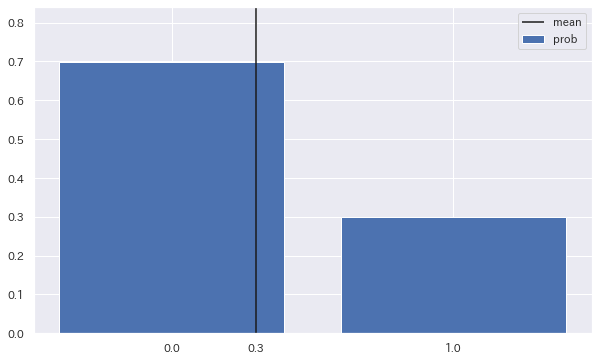

In [6]:
plot_prob(X)

#### 二項分布
成功確率がpのベルヌーイ試行をn回行った時の成功回数が従う分布。二項分布のパラメータには成功確率ｐと試行回数ｎの二つがある。<br>
二項分布を使用する事によって確率と試行回数さえわかれば、成功する回数それぞれの確率を求めることが分かる。<br>
二項分布の期待値E(X):np,分散V(X):np(1-p)


In [7]:
from scipy.special import comb#コンビネーション

def Bin(n , p):
  x_set = np.arange(n+1)
  def f(x):
    if x in x_set:
      return comb(n , x) * p**x * (1-p)**(n - x)#n:試行回数　x:成功した回数
    else :
      return 0
  return x_set , f


In [9]:
n = 10
p=0.3
X=Bin(n,p)
check_prob(X)

期待値は3.0
分散は2.1


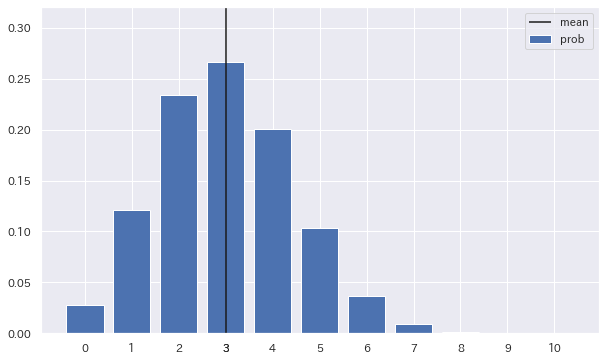

In [10]:
plot_prob(X)

#### 幾何分布
ベルヌーイ試行を繰り返して、はじめて成功するまでの試行回数が従う分布。幾何分布のパラメータはベルヌーイ試行の成功確率パラメタｐとなる。<br>
$期待値E(X):1/p,分散:(1-p)/p^2$

In [11]:
def Ge(p):
  x_set = np.arange(1,30)#今回は１～２９x_setは確率変数
  def f(x):
    if x in x_set:
      return p*(1-p)**(x-1)
    else:
      return 0
  return x_set , f


In [13]:
p = 0.5
X = Ge(p)
check_prob(X)
#2回が平均してはじめて成功する回数

期待値は2.0
分散は2.0


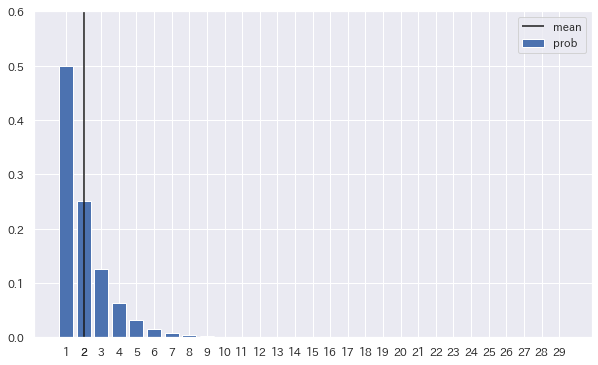

In [14]:
plot_prob(X)